In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
# df = df[["chain","hotel_id"]]
df

,image,chain,hotel_id,timestamp
0,8000d59f6a3d765f.jpg,85,24607,11/28/2018 5:42
1,8000febe81817f7f.jpg,6,25389,1/1/2017 7:01
2,80053befc2d42fba.jpg,3,672,1/26/2018 13:22
3,8007fa0a8fe89f9d.jpg,5,63866,7/3/2020 2:31
4,800a4a6b6f6d2df6.jpg,0,12036,9/22/2017 17:59
...,...,...,...,...
97551,ffff8082ec219892.jpg,83,20544,12/18/2016 3:04
97552,ffff8200e50cc0f1.jpg,82,51053,1/23/2018 3:51
97553,ffff84129981a4a4.jpg,83,42842,3/30/2017 22:45
97554,ffff85015040c2af.jpg,82,6261,11/9/2016 12:34


In [5]:
import pandas as pd

# Load your dataset
file_path = 'train.csv'  # Replace with the correct file path if needed
data = pd.read_csv(file_path)

# Number of unique chains
unique_chains = data['chain'].nunique()
print(f"Number of unique chains: {unique_chains}")

# Number of unique hotel IDs
unique_hotel_ids = data['hotel_id'].nunique()
print(f"Number of unique hotel IDs: {unique_hotel_ids}")

Number of unique chains: 88
Number of unique hotel IDs: 7770


In [6]:
# Count the occurrences of each hotel_id
hotel_id_counts = data["hotel_id"].value_counts()

# Filter hotel_ids with at least 20 occurrences
filtered_hotel_ids = hotel_id_counts[hotel_id_counts >= 20].index.tolist()

# Create a new DataFrame with only the filtered hotel_ids
filtered_data = data[data["hotel_id"].isin(filtered_hotel_ids)]

# Print results
print(f"Number of unique hotel_ids with at least 20 images: {len(filtered_hotel_ids)}")
print(f"Original dataset size: {data.shape[0]} rows")
print(f"Filtered dataset size: {filtered_data.shape[0]} rows")

Number of unique hotel_ids with at least 20 images: 1062
Original dataset size: 97556 rows
Filtered dataset size: 38389 rows


In [11]:
filtered_data['hotel_id'].nunique()

1062

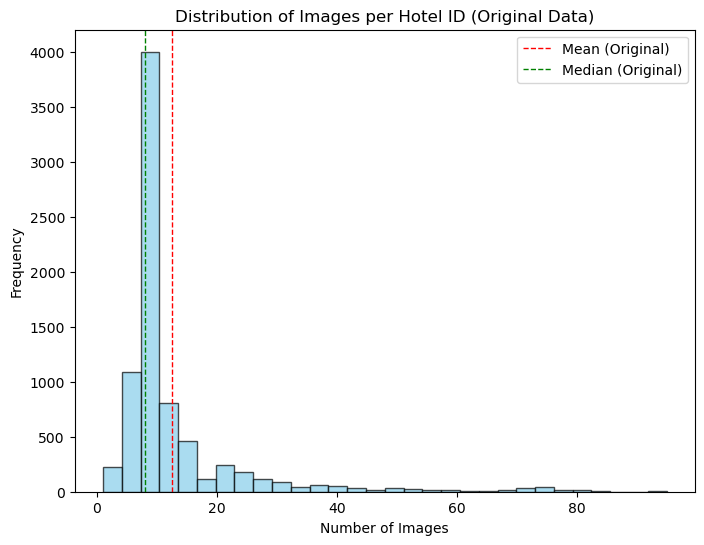

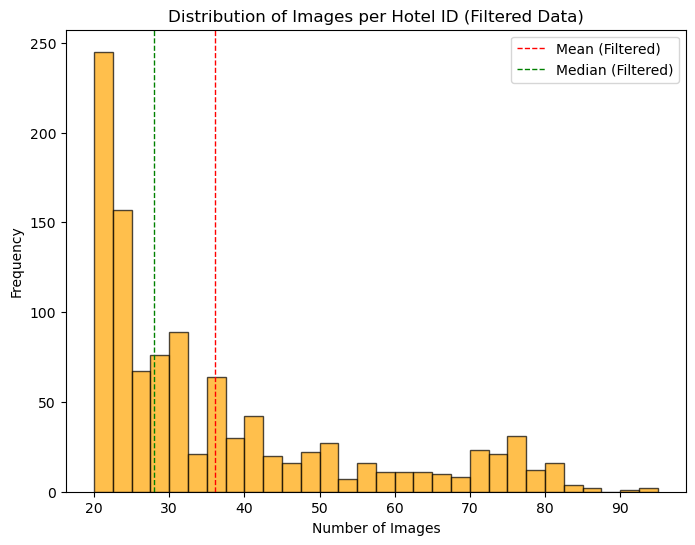

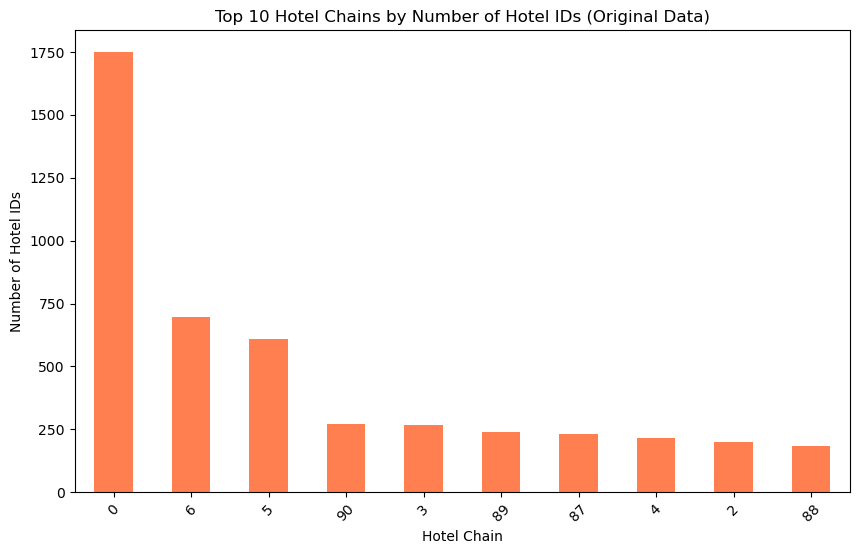

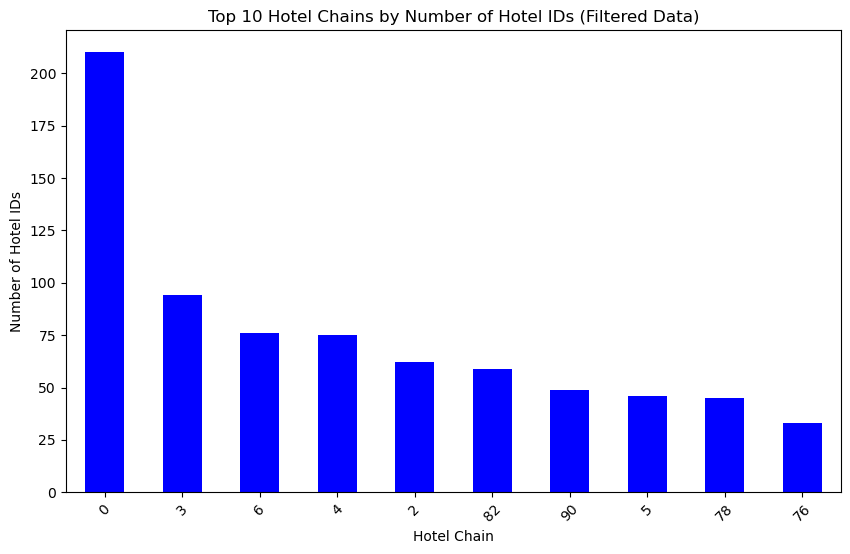

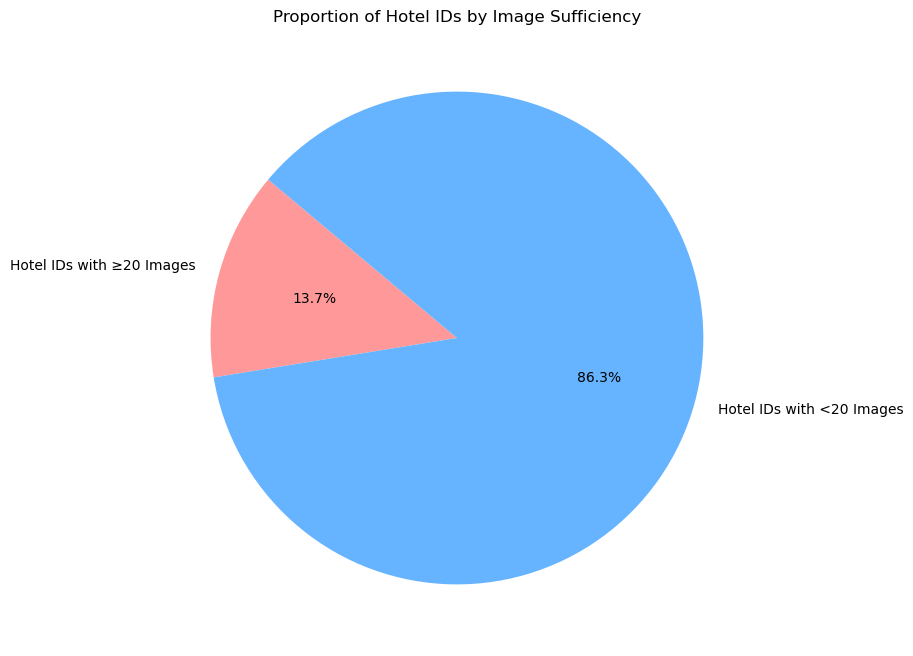

In [9]:
import matplotlib.pyplot as plt

# Count the occurrences of each hotel_id
hotel_id_counts = data["hotel_id"].value_counts()

# Filter hotel_ids with at least 20 occurrences
filtered_hotel_ids = hotel_id_counts[hotel_id_counts >= 20].index.tolist()

# Create a new DataFrame with only the filtered hotel_ids
filtered_data = data[data["hotel_id"].isin(filtered_hotel_ids)]

# Function to visualize the data for both original and filtered datasets
def visualize_data(original_df, filtered_df):
    # A. Distribution of Images per Hotel ID (Original vs Filtered)
    original_counts = original_df["hotel_id"].value_counts()
    filtered_counts = filtered_df["hotel_id"].value_counts()

    # Plot for Original Data
    plt.figure(figsize=(8, 6))
    plt.hist(original_counts, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(original_counts.mean(), color='red', linestyle='dashed', linewidth=1, label='Mean (Original)')
    plt.axvline(original_counts.median(), color='green', linestyle='dashed', linewidth=1, label='Median (Original)')
    plt.title('Distribution of Images per Hotel ID (Original Data)')
    plt.xlabel('Number of Images')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Plot for Filtered Data
    plt.figure(figsize=(8, 6))
    plt.hist(filtered_counts, bins=30, color='orange', edgecolor='black', alpha=0.7)
    plt.axvline(filtered_counts.mean(), color='red', linestyle='dashed', linewidth=1, label='Mean (Filtered)')
    plt.axvline(filtered_counts.median(), color='green', linestyle='dashed', linewidth=1, label='Median (Filtered)')
    plt.title('Distribution of Images per Hotel ID (Filtered Data)')
    plt.xlabel('Number of Images')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # B. Top Hotel Chains by Number of Hotel IDs (Original vs Filtered)
    original_chain_counts = original_df.groupby("chain")["hotel_id"].nunique().sort_values(ascending=False).head(10)
    filtered_chain_counts = filtered_df.groupby("chain")["hotel_id"].nunique().sort_values(ascending=False).head(10)

    # Plot for Original Data
    plt.figure(figsize=(10, 6))
    original_chain_counts.plot(kind='bar', color='coral')
    plt.title('Top 10 Hotel Chains by Number of Hotel IDs (Original Data)')
    plt.xlabel('Hotel Chain')
    plt.ylabel('Number of Hotel IDs')
    plt.xticks(rotation=45)
    plt.show()

    # Plot for Filtered Data
    plt.figure(figsize=(10, 6))
    filtered_chain_counts.plot(kind='bar', color='blue')
    plt.title('Top 10 Hotel Chains by Number of Hotel IDs (Filtered Data)')
    plt.xlabel('Hotel Chain')
    plt.ylabel('Number of Hotel IDs')
    plt.xticks(rotation=45)
    plt.show()

    # C. Proportion of Hotel IDs Meeting Image Sufficiency Condition (≥20 Images)
    total_hotel_ids = original_df["hotel_id"].nunique()
    filtered_hotel_ids = filtered_df["hotel_id"].nunique()
    sizes = [filtered_hotel_ids, total_hotel_ids - filtered_hotel_ids]
    labels = ['Hotel IDs with ≥20 Images', 'Hotel IDs with <20 Images']
    colors = ['#ff9999', '#66b3ff']

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Proportion of Hotel IDs by Image Sufficiency')
    plt.show()


# Visualize data for original and filtered datasets
visualize_data(data, filtered_data)


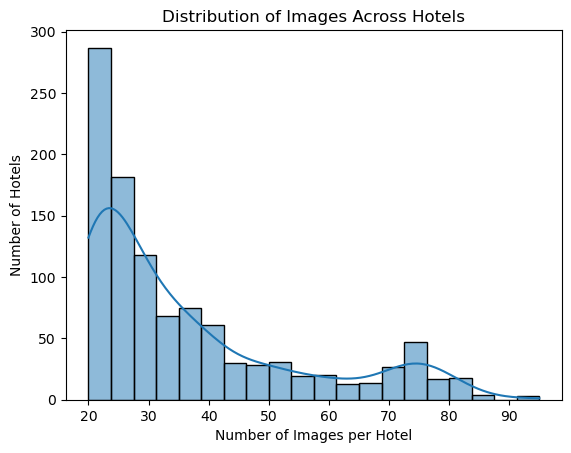

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame named 'df' with columns 'hotel_id' and 'image'

# Count the number of images for each hotel
hotel_image_counts = filtered_data.groupby('hotel_id')['image'].count()

# Create a histogram to visualize the distribution
sns.histplot(hotel_image_counts, kde=True, bins=20)
plt.xlabel('Number of Images per Hotel')
plt.ylabel('Number of Hotels')
plt.title('Distribution of Images Across Hotels')
plt.show()

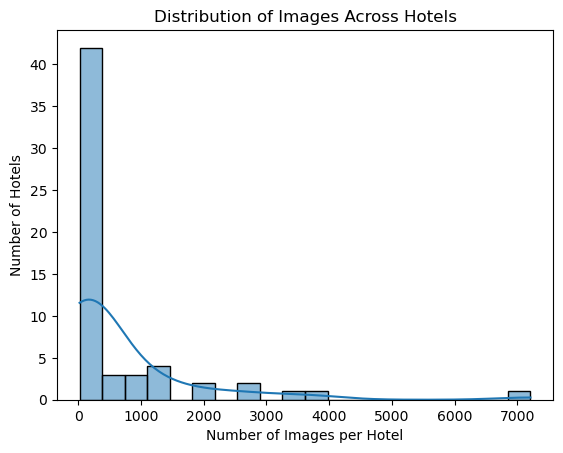

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame named 'df' with columns 'hotel_id' and 'image'

# Count the number of images for each hotel
hotel_image_counts = filtered_data.groupby('chain')['hotel_id'].count()

# Create a histogram to visualize the distribution
sns.histplot(hotel_image_counts, kde=True, bins=20)
plt.xlabel('Number of Images per Hotel')
plt.ylabel('Number of Hotels')
plt.title('Distribution of Images Across Hotels')
plt.show()